In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime 
import calendar

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, train_test_split
from sklearn import metrics

%matplotlib inline
sns.set()

plt.style.use('fivethirtyeight')

In [2]:
df = pd.read_csv("retail_store_data.csv")
df

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False
...,...,...,...,...,...
241333,25,32,2011-10-14,3298.56,FALSE
241334,25,32,2011-10-21,3297.56,FALSE
241335,25,32,2011-10-28,2965.97,FALSE
241336,25,32,2011-11-04,2524.38,FALSE


In [3]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [4]:
df.tail()

,Store,Dept,Date,Weekly_Sales,IsHoliday
241333,25,32,2011-10-14,3298.56,FALSE
241334,25,32,2011-10-21,3297.56,FALSE
241335,25,32,2011-10-28,2965.97,FALSE
241336,25,32,2011-11-04,2524.38,FALSE
241337,25,32,2011-11-11,3377.43,FAL


In [5]:
df.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday'], dtype='object')

In [6]:
df.shape

(241338, 5)

## EDA

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241338 entries, 0 to 241337
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         241338 non-null  int64  
 1   Dept          241338 non-null  int64  
 2   Date          241338 non-null  object 
 3   Weekly_Sales  241338 non-null  float64
 4   IsHoliday     241338 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 9.2+ MB


In [8]:
# Changing ‘Date’ column from an object to be a datetime object
df['Date'] = pd.to_datetime(df['Date']) 

In [9]:
df.dtypes

Store                    int64
Dept                     int64
Date            datetime64[ns]
Weekly_Sales           float64
IsHoliday               object
dtype: object

In [10]:
# Converting 'IsHoliday' column from an object to a boolean 
df['IsHoliday'].astype('bool')

0         False
1          True
2         False
3         False
4         False
          ...  
241333     True
241334     True
241335     True
241336     True
241337     True
Name: IsHoliday, Length: 241338, dtype: bool

In [11]:
df['IsHoliday'] = df['IsHoliday'].astype('bool')
df.dtypes

Store                    int64
Dept                     int64
Date            datetime64[ns]
Weekly_Sales           float64
IsHoliday                 bool
dtype: object

In [12]:
# Converting 'Weekly_Sales' column from an object to a float
df['Weekly_Sales'] = pd.to_numeric(df['Weekly_Sales']) 

In [13]:
df.dtypes

Store                    int64
Dept                     int64
Date            datetime64[ns]
Weekly_Sales           float64
IsHoliday                 bool
dtype: object

In [14]:
#df['Date']=pd.to_datetime(df['Date'])
#df['Week']=df.Date.dt.week
#df['Year']=df.Date.dt.year
df[['Year','Month','Day']] = df.Date.apply(lambda x: pd.Series(x.strftime("%Y,%m,%d").split(",")))
df

,Store,Dept,Date,Weekly_Sales,IsHoliday,Year,Month,Day
0,1,1,2010-02-05,24924.50,False,2010,02,05
1,1,1,2010-02-12,46039.49,True,2010,02,12
2,1,1,2010-02-19,41595.55,False,2010,02,19
3,1,1,2010-02-26,19403.54,False,2010,02,26
4,1,1,2010-03-05,21827.90,False,2010,03,05
...,...,...,...,...,...,...,...,...
241333,25,32,2011-10-14,3298.56,True,2011,10,14
241334,25,32,2011-10-21,3297.56,True,2011,10,21
241335,25,32,2011-10-28,2965.97,True,2011,10,28
241336,25,32,2011-11-04,2524.38,True,2011,11,04


In [15]:
#Extracting year from the Date Column
#df['Year']=pd.DatetimeIndex(df['Date']).year
#df

In [16]:
#Extracting month from 'Date' column
#df['Month']=pd.DatetimeIndex(df['Date']).month
#df

In [17]:
# Converting to datetime object
#df['Year']=pd.to_datetime(df['Year'])
#df['Month']=pd.to_datetime(df['Month'])
#df['Week']=pd.to_datetime(df['Week'])

In [18]:
df.dtypes

Store                    int64
Dept                     int64
Date            datetime64[ns]
Weekly_Sales           float64
IsHoliday                 bool
Year                    object
Month                   object
Day                     object
dtype: object

In [19]:
df.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Year            0
Month           0
Day             0
dtype: int64

In [20]:
# missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
Day,0,0.0
Month,0,0.0
Year,0,0.0
IsHoliday,0,0.0
Weekly_Sales,0,0.0
Date,0,0.0
Dept,0,0.0
Store,0,0.0


No missing values found.

In [21]:
df.describe()

,Store,Dept,Weekly_Sales
count,241338.000000,241338.000000,241338.000000
mean,12.755298,43.184438,17602.840792
std,7.066384,29.728050,24483.998174
min,1.000000,1.000000,-1699.000000
25%,7.000000,19.000000,2817.917500
50%,13.000000,36.000000,8612.850000
75%,19.000000,71.000000,22120.662500
max,25.000000,99.000000,693099.360000


In [22]:
df.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Year', 'Month',
       'Day'],
      dtype='object')

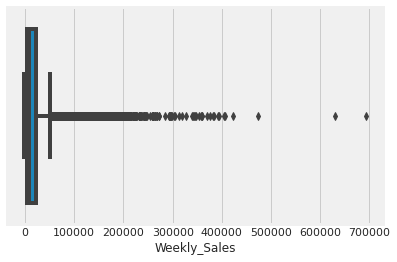

In [23]:
# Detecting outliers
sns.boxplot(x=df['Weekly_Sales'])

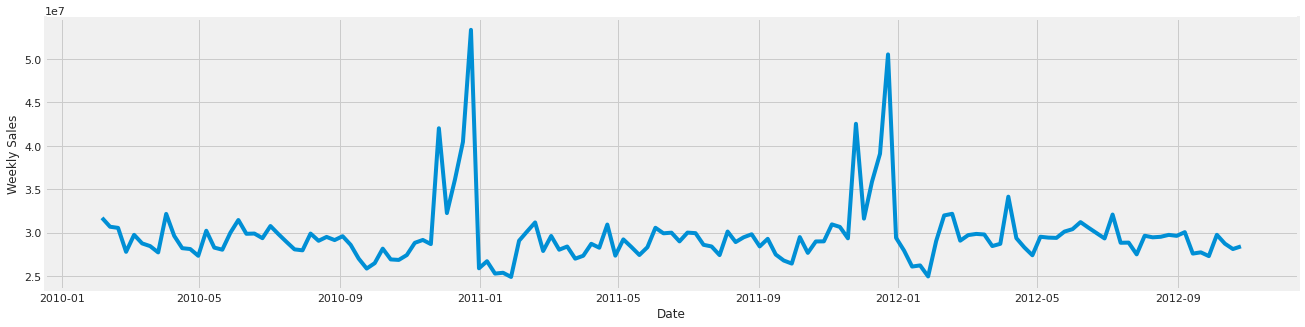

In [24]:
df_average_sales_week = df.groupby(by=['Date'], as_index=False)['Weekly_Sales'].sum()
df_average_sales = df_average_sales_week.sort_values('Weekly_Sales', ascending=False)

plt.figure(figsize=(20,5))
plt.plot(df_average_sales_week.Date, df_average_sales_week.Weekly_Sales)
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.show()


In [25]:
# Top 3 performing stores in each month
df_top_stores = df.groupby(by=['Store'], as_index=False)['Weekly_Sales'].sum()
df_top_stores.sort_values('Weekly_Sales', ascending=False)[:3]

,Store,Weekly_Sales
19,20,3.013978e+08
3,4,2.995440e+08
13,14,2.889999e+08


In [26]:
# Department which makes the maximum sales each month
df_top_stores = df.groupby(by=['Dept'], as_index=False)['Weekly_Sales'].sum()
df_top_stores.sort_values('Weekly_Sales', ascending=False)

,Dept,Weekly_Sales
72,92,2.641804e+08
75,95,2.567345e+08
36,38,2.437625e+08
59,72,2.138638e+08
1,2,1.856176e+08
...,...,...
49,51,1.818365e+04
62,78,1.241960e+03
37,39,1.760000e+02
41,43,7.320000e+00


## Forecasting

In [27]:
X=df.drop('Weekly_Sales',axis=1)
y=df['Weekly_Sales']

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size = 0.5)

In [29]:
print('Shape of X_test = ', X_test.shape,  '\nShape of y_test ='  , y_test.shape)
print('Shape of X_train = ', X_train.shape,  '\nShape of y_train ='  , y_train.shape)
print('Shape of X_val = ', X_val.shape,  '\nShape of y_val ='  , y_val.shape)

Shape of X_test =  (18100, 7) 
Shape of y_test = (18100,)
Shape of X_train =  (205137, 7) 
Shape of y_train = (205137,)
Shape of X_val =  (18101, 7) 
Shape of y_val = (18101,)
